In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

# 1. Obtenga el conjunto de datos de clasificación de imágenes pequeñas CIFAR10

In [ ]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


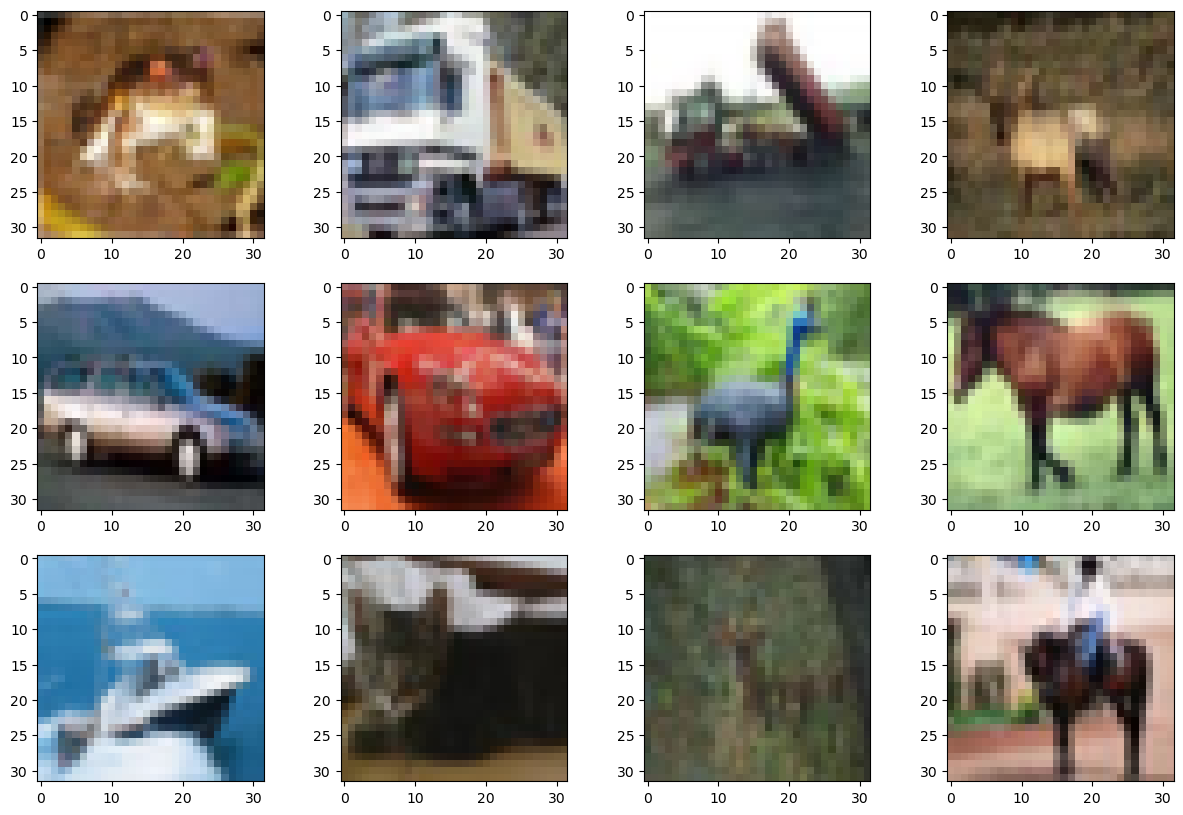

In [4]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
plt.figure(figsize=(15, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow((x_train[i]))

# 2. Cree su propio modelo CNN personalizado para clasificar las fotos. ¿Cuál es la precisión en el tren y los conjuntos de prueba?

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical

In [15]:
def predictors(train,test):
    trainY = to_categorical(train)
    testY = to_categorical(test)
    trainY = tf.stack(trainY)
    testY = tf.stack(testY)
    return trainY,testY

In [16]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

accurary: 79.706


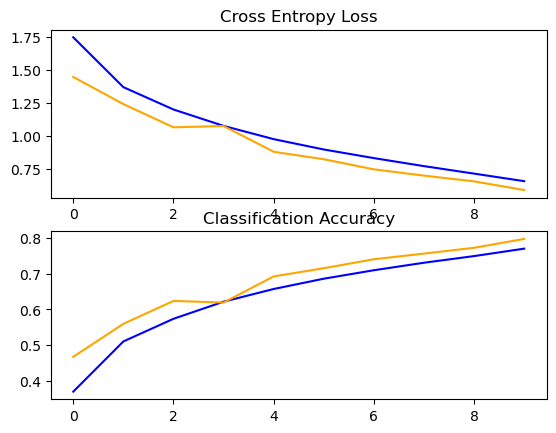

In [18]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # output of the model
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


    return model

# plot loss and accuracy
def summarize_diagnostics(history):
    plt.figure(figsize=(15, 8))
 # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    
# run and evaluate
def run_evaluate():
    trainX, testX = prep_pixels(x_train, x_train)
    trainY, testY = predictors(y_train, y_train)
    trainX = tf.stack(trainX)
    testX = tf.stack(testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX,trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('accurary: %.3f' % (acc * 100.0))
     # learning curves
    summarize_diagnostics(history)

run_evaluate()

# 3. Obtenga el modelo de MobileNet

In [20]:
from keras.applications import MobileNet

base_model = MobileNet(include_top=False, weights='imagenet',
            input_shape=(32,32,3), classes=y_train.shape[1])

17225924/17225924 [==============================] - 10s 1us/step


# 4. Utilice el aprendizaje por transferencia y cree un nuevo modelo basado en MobileNet. ¿Cuál es la precisión en el tren y los conjuntos de prueba?
# 5. Intente ajustar las capas superiores para aumentar la precisión.

accurary: 91.912


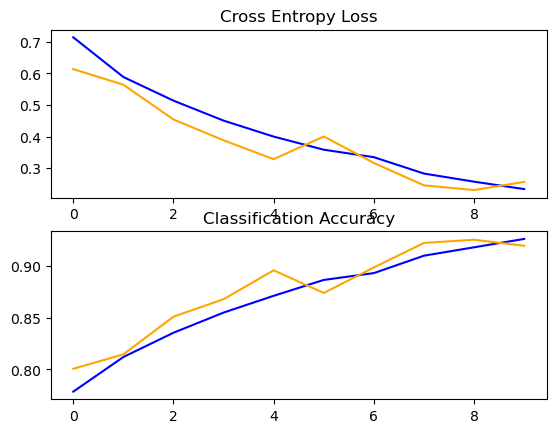

In [25]:
def define_transfer_model(base_model):
    model = Sequential()
    #Creating base layer of MobileNet
    model.add(base_model)
    #model.add(Dropout(0.5))
    model.add(Flatten())
    #Adding the Dense Layers and Dropout
    model.add(Dense(512,activation=('relu'))) 
    model.add(Dense(256,activation=('relu'))) 
    #model.add(Dropout(.1))
    model.add(Dense(128,activation=('relu')))
    #model.add(Dropout(.1))
    model.add(Dense(10,activation=('softmax')))
    #Compiling Model using SGD 
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

    return model

# run and evaluate
def run_evaluate_transfer(base_model):
    trainX, testX = prep_pixels(x_train, x_train)
    trainY, testY = predictors(y_train, y_train)
    trainX = tf.stack(trainX)
    testX = tf.stack(testX)
    # define model
    model = define_transfer_model(base_model)
    # fit model
    history = model.fit(trainX,trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('accurary: %.3f' % (acc * 100.0))
     # learning curves
    summarize_diagnostics(history)

run_evaluate_transfer(base_model)

# 6. ¿Qué modelo funcionó mejor?

De acuerdo a los resultados mostrados anteriormente, el mejor modelo fue el hecho con transfer learning con un 91.91 % de accuracy, mientras que el modelo hecho desde cero obtuvo un 79.7 % de accuracy.